In [10]:
import cv2
import numpy as np
import imutils as imu
import matplotlib.pyplot as plt
import skimage as skimage
from IPython.display  import Audio
import numpy as np
import scipy.io.wavfile as wavfile
from scipy.signal import wiener

# rle algorithm

In [11]:
def encoding(data):
    current = data[0]
    out = []
    count = 1
    for x in data[1:]:
        if x == current:
            count += 1
        else:
            out.append((count,current))
            count = 1
            current = x
    out.append((count,current))
    return out
def decoding (data):
    out = []
    for count,value in data:
        out.extend([value] * count)
    return out

In [12]:
image  = cv2.imread("WIN_20251216_10_34_20_Pro.jpg", cv2.IMREAD_COLOR_BGR)
h, w, d = image.shape
image_flatten = image.flatten()
encoded_image = encoding(image_flatten)
decoded_image  = decoding(encoded_image)
print(f"encoded {len(encoded_image)}")
print(f"decoded {len(decoded_image)}")
print(f"the orginal {len(image_flatten)}")
print(f"the diff {len(decoded_image)} - {len(encoded_image)}  =  {len(decoded_image) - len(encoded_image)}")

encoded 2682600
decoded 2764800
the orginal 2764800
the diff 2764800 - 2682600  =  82200


# manipulation images in cv2

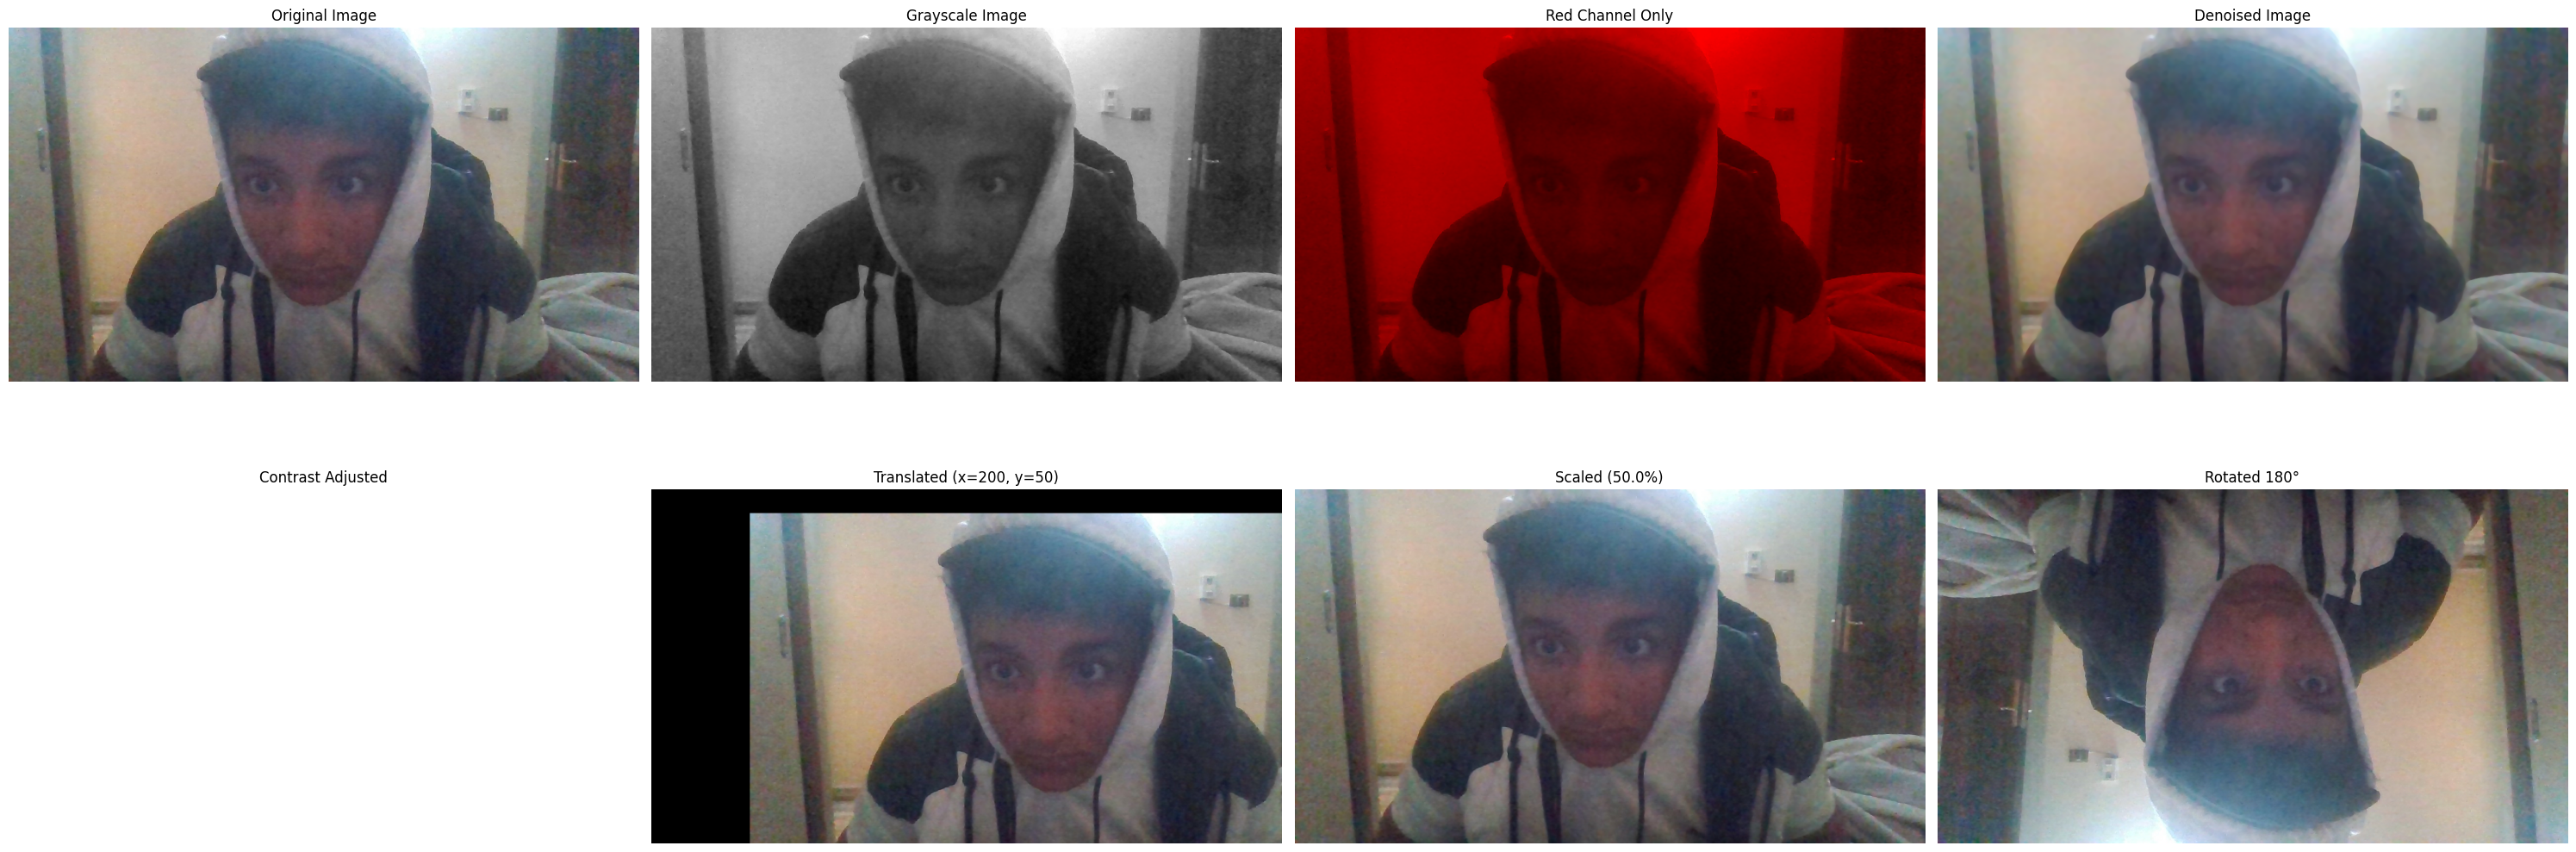

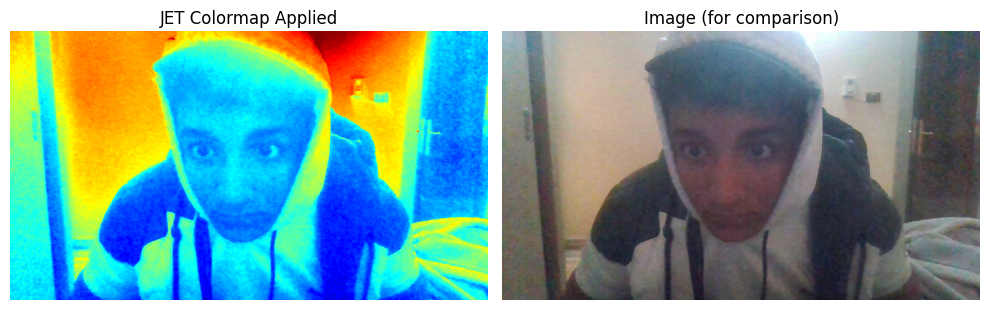

: 

In [ ]:
# Load the original image
image = cv2.imread('WIN_20251216_10_34_20_Pro.jpg')

# Parameters
beta = 2
alpha = 50
x_translation = 200
y_translation = 50

# Get image dimensions
rows, cols = image.shape[:2]

# ========== IMAGE TRANSFORMATIONS ==========

# 1. Translation
translation_matrix = np.float32([[1, 0, x_translation], [0, 1, y_translation]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))

# 2. Denoising
denoised_image = cv2.medianBlur(image, ksize=9)

# 3. Contrast adjustment
adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# 4. Rotation (180 degrees)
rotated_image = cv2.rotate(image, cv2.ROTATE_180)

# 5. Scaling
scale_factor = 0.5
new_h = int(rows * scale_factor)
new_w = int(cols * scale_factor)
scaled_image = cv2.resize(image, (new_w, new_h))

# 6. Grayscale conversion
image_gray = cv2.imread('WIN_20251216_10_34_20_Pro.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale back to BGR (3 channels)
color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)

# Set specific channels to 0 (creating a red-only image)
# Note: OpenCV uses BGR format, not RGB
color[:, :, 0] = 0  # Blue channel = 0
color[:, :, 1] = 0  # Green channel = 0
# Red channel remains as is

# Convert to proper BGR for display (if needed)
colored_display = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

# 7. Color mapping (apply colormap to grayscale image)
colored_map = cv2.applyColorMap(image_gray, cv2.COLORMAP_JET)

# ========== VISUALIZATION ==========
plt.figure(figsize=(30, 12))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(colored_display)
plt.title("Red Channel Only")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title("Denoised Image")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(contrast_image)
plt.title("Contrast Adjusted")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title(f"Translated (x={x_translation}, y={y_translation})")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title(f"Scaled ({scale_factor*100}%)")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated 180°")
plt.axis("off")

plt.tight_layout()
plt.show()

# Additional visualization for the colormap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(colored_map, cv2.COLOR_BGR2RGB))
plt.title("JET Colormap Applied")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image (for comparison)")
plt.axis("off")
plt.tight_layout()
plt.show()